In [1]:
# FS wave propagation plots using solution to Helmholtz, 2015-11-23

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

In [2]:
# The solution formula is a function of time so I chose time as the horizontal axis of the plot
# A spatial dimension could have been chosen instead but then extra calculations would be 
# required for the plot so its relationship with the solution formula wouldn't be so obvious.

c = 299792458         # Speed of light in a vaccum, m/s.
wavelength = 532e-9   # A nice green is 532 nm.

nu = c/wavelength     # Frequency == oscillation periods per unit time.
omega = 2*np.pi*nu    # Angular frequency == radians per unit time.

threewavetime = 3 * wavelength / c # Time for three waves to pass at speed of light.

samples = 100 # Number of moments in times we want to sample
timelist = np.linspace(0, threewavetime, samples) # A list of times to show on plot

clocklist = timelist # Oh this is such a horrible way to do it! But works it for the animation method.

amplitude = 3.0    # Amplitude of wave
phase = np.pi * 1  # Phase at reference position in space

# Make a phasor

U_p = amplitude * np.e**(1j*phase) 

# Solution of Helmholtz for wave height at various times == wave propagation in phasor notation

def u_p(time):
     return (U_p * np.e**(-1j*omega*time)).real

<IPython.core.display.Javascript object>


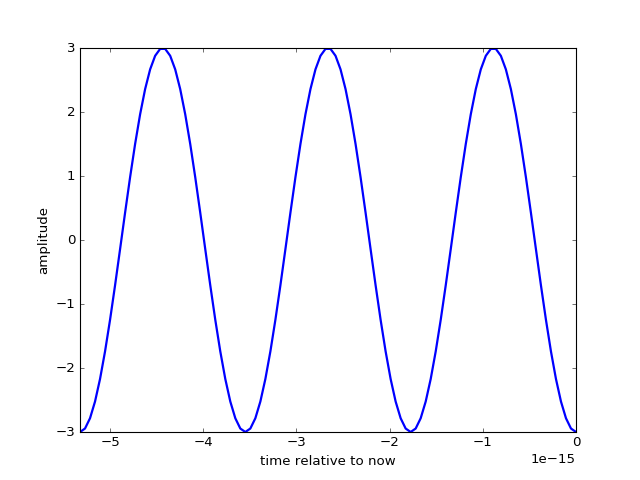

In [3]:
# Copied from an animation example on the web. The first one found with a Google search.
# I don't particularly like it but I don't want to spend ages writing a better one.

fig = plt.figure()
ax =  plt.axes(xlim=(-threewavetime,0), ylim=(-amplitude, +amplitude))
ax.set_xlabel('time relative to now')
ax.set_ylabel('amplitude')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

def animate(i):
    waveheight = u_p(clocklist[i]-timelist)
    line.set_data(-timelist, waveheight)                   
    return line,

In [4]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=20, blit=True, repeat=False)
plt.show()


In [6]:

def circle(x,y,r):
    if(x**2+y**2<=r**2):
        return 1
    else:
        return 0
    
#sampling array- 1D array twice
space_to_plot=10
space_density=10
x_array = np.linspace(-space_to_plot*0.5,space_to_plot*0.5,space_to_plot*space_density)
cos_array = np.cos(x_array)
cos_grad = np.gradient(cos_array)

#circle matrix
def createCircleMatrix(x_array,r):
    circle_matrix = np.zeros((len(x_array),len(x_array)))
    for x in range(0,len(x_array)):
        for y in range(0,len(x_array)):
            circle_matrix[x][y] = circle(x_array[x],x_array[y],r)
    return circle_matrix

circ_matrix = createCircleMatrix(x_array,2)
circ_grad = np.gradient(circ_matrix)
 
#plotting
cos_fig = plt.figure()
cos_fig.suptitle("Cosine wave")

cos_subfig = cos_fig.add_subplot(1,3,1)
cos_subfig.set_title("wave",fontsize=10)
cos_subfig.plot(x_array,cos_array,"r")

cos_grad_subfig = cos_fig.add_subplot(1,3,2)
cos_grad_subfig.set_title("gradient of wave",fontsize=10)
cos_grad_subfig.plot(x_array,cos_grad,"g")

cos_tog_subfig = cos_fig.add_subplot(1,3,3)
cos_tog_subfig.set_title("wave(r) and its gradient(g)",fontsize=10)
cos_tog_subfig.plot(x_array,cos_array,"r")
cos_tog_subfig.plot(x_array,cos_grad,"g")

cos_fig.show()

circle_fig= plt.figure()
circle_fig.suptitle("Circle")

circ_subfig = circle_fig.add_subplot(2,2,1)
circ_subfig.set_title("circle",fontsize=10)
circ_subfig.imshow(circ_matrix,cmap=cm.Greys_r)

circ_gradX_subfig = circle_fig.add_subplot(2,2,2)
circ_gradX_subfig.set_title("gradient of circle(X)",fontsize=10)
circ_gradX_subfig.imshow(circ_grad[1],cmap=cm.Greys_r)

circ_gradY_subfig = circle_fig.add_subplot(2,2,3)
circ_gradY_subfig.set_title("gradient of circle(Y)",fontsize=10)
circ_gradY_subfig.imshow(circ_grad[0],cmap=cm.Greys_r)

circ_gradXY_subfig = circle_fig.add_subplot(2,2,4)
circ_gradXY_subfig.set_title("gradient of circle(XY by addition)",fontsize=10)
circ_gradXY_subfig.imshow(circ_grad[0]+circ_grad[1],cmap=cm.Greys_r)

circle_fig.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'cm' is not defined